<center><h1>Inteligencia Artificial</header1></center>

# Importación de librerias necesarias

In [ ]:
#Se importa las librerias necesarias para realizar el laboratorio
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Cargar el Dataset

In [3]:
#Se carga el dataset con las respectivas imagenes del rostro de nuestros compañeros
images_path = "./ProyectoImagenes"
#images_path = "/Users/Usuario1/Downloads/principal/proyectoIA"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['GenesisHeredia', 'JoseRuiz', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis']


## Descripción de la fuente

    Se crea una carpeta donde se encuentra guardadas todas las imagenes de los 25 compañeros tomadas de tres angulos por cada persona, se carga las imagenes con todas las caracteristicas de cada imagen. El cual las imagenes que se encuentran en el dataset es para entrenar el modleo que permita la respectiva autenticaciòn del usuario mediante un aplicativo web. En el cual las imagenes seran entrenadas y pasadas a prueba para la autenticaciòn.

## Explique el problema a resolver. 

Para realizar este proyecto se utiliza imagenes de rostro de los compañeros tomadas de tres angulos distintos, que son de frente, izquierda y derecha. El cual seran entrenadas mediante un algoritmo supervisado. Se crea varias etiquetas, con informaciòn de entrada y salida. Al momento de entrenar la respectiva red se entrenara y ajustara los respectivos pesos de las neuronas. Tambien se utilizara la Convolutional Neural Network y se utilizara las respectivas librerias.


## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se trabajara con las 3 imagenes tomadas del rostro de diferentes posicion que tendra cada estudiante pero en
este caso se utilizara de 5 personas, el cual dos de los integrantes del grupo y 3 de fotos de cualquier compañero de clase. El tamaño de las imagenes se toma tamaño carnet de tipo americano.


In [4]:
#Aqui espcificamos la carpeta donde se especifica el aumento de cada imagen
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copying Image - {} in ProyectoImagenesAumentacion/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join("./ProyectoImagenesAumentacion/" + class_name, element) 
        shutil.copy(src, dst)

Copying Image - L00392991_1.jpg in ProyectoImagenesAumentacion/GenesisHeredia

Copying Image - L00392991_2.jpg in ProyectoImagenesAumentacion/GenesisHeredia

Copying Image - L00392991_3.jpg in ProyectoImagenesAumentacion/GenesisHeredia

Copying Image - L00380361_1.jpg in ProyectoImagenesAumentacion/JoseRuiz

Copying Image - L00380361_2.jpg in ProyectoImagenesAumentacion/JoseRuiz

Copying Image - L00380361_3.jpg in ProyectoImagenesAumentacion/JoseRuiz

Copying Image - L00073392_1.jpg in ProyectoImagenesAumentacion/MosqueraLucy

Copying Image - L00073392_2.jpg in ProyectoImagenesAumentacion/MosqueraLucy

Copying Image - L00073392_3.jpg in ProyectoImagenesAumentacion/MosqueraLucy

Copying Image - L00380424_1.jpg in ProyectoImagenesAumentacion/Nataly Acosta

Copying Image - L00380424_2.jpg in ProyectoImagenesAumentacion/Nataly Acosta

Copying Image - L00380424_3.jpg in ProyectoImagenesAumentacion/Nataly Acosta

Copying Image - L00393001_1.jpg in ProyectoImagenesAumentacion/OlallaLuis

Copy

In [5]:
#Con este codigo se definira la rotacion, ancho, desplazamiento, el zoom y el rango de escala

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [7]:

#Se crea la carpeta de las imagenes  aumentadas para la carpeta   
#ruta hacia la carpeta
os.chdir(r"\Users\Usuario1\Downloads\ProyectoImagenesAumentacion\GenesisHeredia")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'GenesisHeredia ', 
            save_format='jpg'):
        i += 1
        #Especificamos el numero de imagenes a aumentar en este caso necesitamos las imagenes de 3 personas que son en total 
        #9 imagenes de cada lado.
        #Para el aumento en cada carpeta sera 30 imagenes.
        if i == 9:      
            break  

In [9]:

#Creando imagnes aumentadas para la carpeta de DanielaLuucy

os.chdir(r"\Users\Usuario1\Downloads\ProyectoImagenesAumentacion\MosqueraLucy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'MosqueraLucy', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [8]:

# Se crea las  imagnes aumentadas para la carpeta
os.chdir(r"\Users\Usuario1\Downloads\ProyectoImagenesAumentacion\JoseRuiz")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'JoseRuiz', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [12]:

# Se Crea las  imagnes aumentadas para la carpeta """

os.chdir(r"\Users\Usuario1\Downloads\ProyectoImagenesAumentacion\OlallaLuis")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [10]:

#Crea imagnes aumentadas para la carpeta  
os.chdir(r"\Users\Usuario1\Downloads\ProyectoImagenesAumentacion\Nataly Acosta")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Nataly Acosta', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  


## NLM Filter for image denoising

In [13]:
# Se procede  a eliminar el ruido de las imagenes en cada una de las carpetas de cada persona


#os.chdir(r"/Users/johan/Downloads/")
os.chdir(r"/Users/Usuario1/Downloads/")
images_path = "./ProyectoImagenesAumentacion"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['GenesisHeredia', 'JoseRuiz', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis']


In [14]:
#Una vez realizado las imagenes aumentadas  la eliminacion  del ruido que se especifica la carpeta correcta del proceso y donde se guardara


for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './Proyecto-ImagenesDenoid/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in GenesisHeredia

Processing Image - 2 in GenesisHeredia

Processing Image - 3 in GenesisHeredia

Processing Image - 4 in GenesisHeredia

Processing Image - 5 in GenesisHeredia

Processing Image - 6 in GenesisHeredia

Processing Image - 7 in GenesisHeredia

Processing Image - 8 in GenesisHeredia

Processing Image - 9 in GenesisHeredia

Processing Image - 10 in GenesisHeredia

Processing Image - 11 in GenesisHeredia

Processing Image - 12 in GenesisHeredia

Processing Image - 13 in GenesisHeredia

Processing Image - 14 in GenesisHeredia

Processing Image - 15 in GenesisHeredia

Processing Image - 16 in GenesisHeredia

Processing Image - 17 in GenesisHeredia

Processing Image - 18 in GenesisHeredia

Processing Image - 19 in GenesisHeredia

Processing Image - 20 in GenesisHeredia

Processing Image - 21 in GenesisHeredia

Processing Image - 22 in GenesisHeredia

Processing Image - 23 in GenesisHeredia

Processing Image - 24 in GenesisHeredia

Processing Image - 25 in 

## Background Removal

In [15]:
images_path = "./Proyecto-ImagenesDenoid"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['GenesisHeredia', 'JoseRuiz', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis']


In [16]:
#se procede  a eliminar el fondo de todas las imagenes despues de eliminar el ruido

for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images ruta de la carpeta
        save_path = './Proyecto-ImagenesRGB/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in GenesisHeredia

Processing Image - 2 in GenesisHeredia

Processing Image - 3 in GenesisHeredia

Processing Image - 4 in GenesisHeredia

Processing Image - 5 in GenesisHeredia

Processing Image - 6 in GenesisHeredia

Processing Image - 7 in GenesisHeredia

Processing Image - 8 in GenesisHeredia

Processing Image - 9 in GenesisHeredia

Processing Image - 10 in GenesisHeredia

Processing Image - 11 in GenesisHeredia

Processing Image - 12 in GenesisHeredia

Processing Image - 13 in GenesisHeredia

Processing Image - 14 in GenesisHeredia

Processing Image - 15 in GenesisHeredia

Processing Image - 16 in GenesisHeredia

Processing Image - 17 in GenesisHeredia

Processing Image - 18 in GenesisHeredia

Processing Image - 19 in GenesisHeredia

Processing Image - 20 in GenesisHeredia

Processing Image - 21 in GenesisHeredia

Processing Image - 22 in GenesisHeredia

Processing Image - 23 in GenesisHeredia

Processing Image - 24 in GenesisHeredia

Processing Image - 25 in 

## Data loading and exploration

In [17]:
#Se procede a trabajar  con todas las imagenes que fueron ya por cada persona tenemos 5 clases

fpath = './Proyecto-ImagenesRGB'
random_seed = 9

categories = os.listdir(fpath)
print("Lista de categorias = ",categories,"\n\nNo. of categories = ", len(categories))

Lista de categorias =  ['GenesisHeredia', 'JoseRuiz', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis'] 



No. of categories =  5


En este proceso se debe definir las categorias que tiene cada imagen de los estudiantes ya que cuentan con una foto que esta almacenado en las carpetas. A las imagenes que se realizo el arreglo de eliminacion de ruido, fondo sera con las que trabaja,os.


In [18]:
#Se agrega etiquetas para cada una de las categorias 

#Se agrega etiquetas para cada una de las categorias ya especificadas anteriormente
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels
#Etiquetas por cada una de las categorias
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  150 

No. of labels loaded =  150

<class 'list'> <class 'list'>


In [ ]:
#para las respectivas etiquetas de las  imagenes se utiliza numpy mediante un arreglo
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

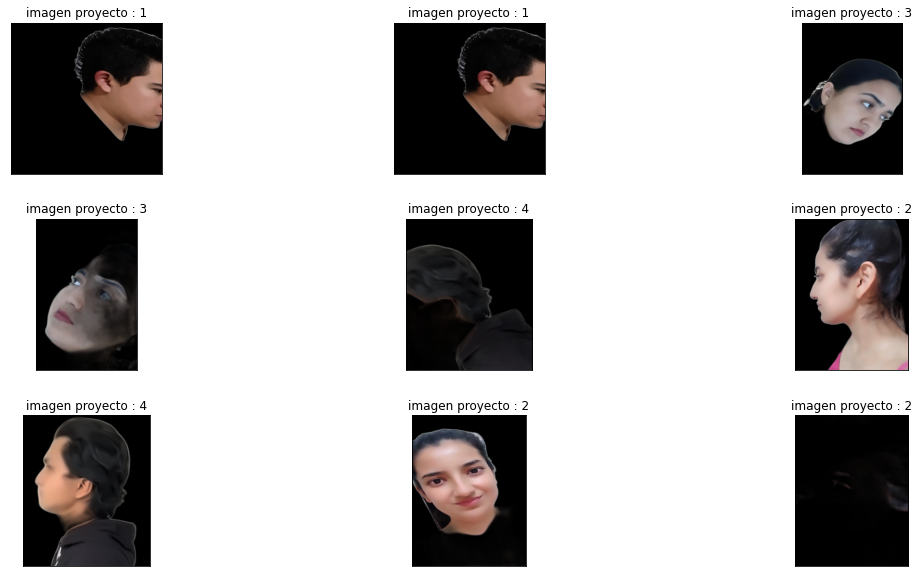

In [20]:
"""Por medio de un plot se extraen imagenes de manera aleatoria y las etiquetamos como imagen proyecto y el numero identificador"""
def display_rand_images(images, labels):

    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('imagen proyecto : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

##  AlexNet CNN Arquitectura 

Para el reconocimiento de las imagenes se utiliza AlexNet. Resuelve el problema de la clasificación de imágenes con un subconjunto del conjunto de datos de ImageNet, procesar datos de píxeles. Para esta arquitectura usamos 5 capas convolucionales y 3 capas totalmente conectadas.Lo cual especificamos para cada uno de las etiquetas anteriormente detalladas.

In [32]:
#Importacion de librerias que se necesitaran

In [2]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization


In [3]:

""" En la primera capa tamaño de kernel 11x11
se procede a normalizar para evitar que las imagenes tengan distancias distintas entre sí"""
# (3) Create a sequential model
model = Sequential()

# 1 primero Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling capa de agrupación (max-pooling) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Normalización por lotes antes de pasarlo a la siguiente capa
model.add(BatchNormalization())



In [4]:
"""En la segunda capa con tamaño de kernel 5x5"""
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [5]:
""" En la tercera capa con tamaño de kernel 3x3"""
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

In [6]:
"""En la cuarta capa con tamaño de kernel 3x3"""
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

In [7]:
"""En la quinta capa con tamaño de kernel 3x3"""
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# capa de agrupación (max-pooling) de 3×3
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


In [8]:


"""Pasarlo a una capa densa"""
model.add(Flatten())


"""# 1ra Capa Densa"""
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))


""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


"""2da Capa Densa"""
model.add(Dense(4096))
model.add(Activation('relu'))

""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

"""capa de salida"""
model.add(Dense(1000))

model.add(Activation('softmax'))

model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 55, 55, 96)        34944     

_________________________________________________________________

activation (Activation)      (None, 55, 55, 96)        0         

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         

_________________________________________________________________

batch_normalization (BatchNo (None, 27, 27, 96)        384       

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    

_________________________________________________________________

activation_1 (Activation)    (None, 27, 27, 256)       0         

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 13, 

 ## Deje de entrenar cuando una métrica monitoreada haya dejado de mejorar

Aplicamos la detención temprana que es un método que le permite especificar una gran cantidad arbitraria de épocas de entrenamiento y detener el entrenamiento una vez que el rendimiento del modelo deja de mejorar en un conjunto de datos de validación de espera.

In [16]:
"""para agregar detención anticipada para sobreajustar modelos de redes neuronales de aprendizaje profundo."""
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [18]:
"""Se implementa los argumentos de EarlyStopping minimizar para la pérdida. Con esto, la métrica a monitorear sería 'loss', y el modo sería 'min'"""
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss'])  # Only 4 epochs are run.


4